# Data Scientist Professional Case Study

### Company Background

National Accessibility currently installs wheelchair ramps for office buildings and schools. The marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. They would like the help of the data science team in predicting which venues already have a ramp installed. 

### Customer Question

The marketing manager would like to know:
- Can you develop a model to predict whether an event venue already has a wheelchair ramp installed?

### Success Criteria

To reduce the amount of time wasted by the company contacting venues that already have a ramp, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 


### Dataset


The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

# Part 1: Exploring the data

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/event_venues.csv")

In [ ]:
df.head()

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False


In [ ]:
# First thing we will be checking for are the data types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3910 non-null   object 
 1   Loud music / events         3910 non-null   bool   
 2   Venue provides alcohol      3910 non-null   int64  
 3   Wi-Fi                       3910 non-null   bool   
 4   supervenue                  3910 non-null   bool   
 5   U-Shaped_max                3910 non-null   float64
 6   max_standing                3910 non-null   int64  
 7   Theatre_max                 3910 non-null   float64
 8   Promoted / ticketed events  3910 non-null   bool   
 9   Wheelchair accessible       3910 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 172.0+ KB


In [ ]:
# Next, we should examine the numerical features
df.describe()

,Venue provides alcohol,U-Shaped_max,max_standing,Theatre_max
count,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.713299,35.045455,114.203581,112.715867
std,0.452278,43.937591,272.269943,131.853249
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,35.045455,0.000000,80.000000
50%,1.000000,35.045455,50.000000,112.715867
75%,1.000000,35.045455,120.000000,112.715867
max,1.000000,2520.000000,7500.000000,4000.000000


### Observations :
* There are no missing values, so we don't need to worry about that.
* venue_name is not going to be significant in predicting wheelchair accessibility, so we should drop that column.
* We should convert all boolean columns to 1's and 0's
* U-shaped_max and Theatre_max both have float data types, but it may be more appropriate to change them to integer types (the maximum capacity for a theatre shouldn't be 112.7 people, 112 is more realistic)

In [ ]:
# Drop the venue_name column
df_new = df.drop('venue_name',axis=1)

In [ ]:
#Change all of our boolean features into False=0 and True=1
df_new['Loud music / events']=df_new['Loud music / events'].astype(int)
df_new['supervenue'] = df_new['supervenue'].astype(int)
df_new['Promoted / ticketed events'] = df_new['Promoted / ticketed events'].astype(int)
df_new['Wheelchair accessible'] = df_new['Wheelchair accessible'].astype(int)
df_new['Wi-Fi'] = df_new['Wi-Fi'].astype(int)

In [ ]:
#Change all of our float features into integers
df_new['U-Shaped_max'] = df_new['U-Shaped_max'].astype(int)
df_new['Theatre_max'] = df_new['Theatre_max'].astype(int)

In [ ]:
df_new.head()

,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,0,0,1,0,35,0,112,0,0
1,1,1,1,0,40,120,80,1,0
2,0,0,1,0,35,0,112,0,0
3,0,0,1,0,35,60,60,0,0
4,0,0,1,0,35,0,112,0,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Loud music / events         3910 non-null   int64
 1   Venue provides alcohol      3910 non-null   int64
 2   Wi-Fi                       3910 non-null   int64
 3   supervenue                  3910 non-null   int64
 4   U-Shaped_max                3910 non-null   int64
 5   max_standing                3910 non-null   int64
 6   Theatre_max                 3910 non-null   int64
 7   Promoted / ticketed events  3910 non-null   int64
 8   Wheelchair accessible       3910 non-null   int64
dtypes: int64(9)
memory usage: 275.0 KB


# Part 2: EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Categorical Features
We will first take a look at all of our categorical features using a countplot. We will group each countplot by the 'Wheelchair accessible' target variable, so we can visualize the number of venues that are wheelchair accessibly for each feature.

* Loud music/events
This feature describes whether the venue hosts loud events.

0 = Does not host loud music/events, 1 = Does host loud music/events

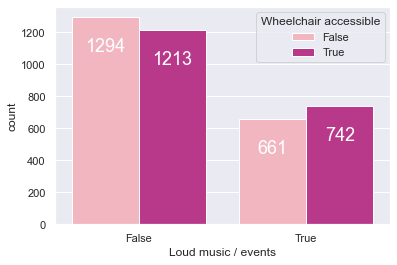

In [ ]:
ax1 = sns.countplot(x='Loud music / events', data=df_new, hue='Wheelchair accessible', palette='RdPu')


for p in ax1.patches:
	ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

* Venue provies alchohol
This feature describes whether or not the venue serves alcohol.

0 = Does not serve alcohol, 1 = Does serve alcohol

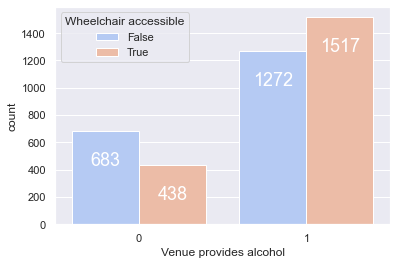

In [ ]:
ax2 = sns.countplot(x='Venue provides alcohol', data=df, hue='Wheelchair accessible', palette='coolwarm')
for p in ax2.patches:
	ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

* Wi-Fi
This feature describes whether or not the venue has wi-fi.

0 = Does not have wi-fi, 1 = Does have wi-fi

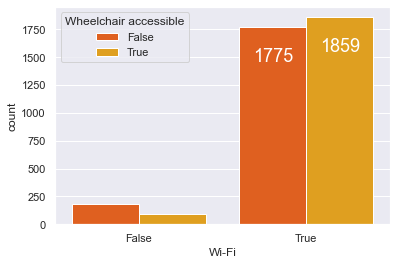

In [ ]:
ax3 = sns.countplot(x='Wi-Fi', data=df_new, hue='Wheelchair accessible',palette='autumn')

for p in ax3.patches:
	ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [ ]:
# We are not able to see the number count for group 0 here, so we can check the value counts using the groupby method
df_new.groupby('Wi-Fi')['Wheelchair accessible'].value_counts()

Wi-Fi  Wheelchair accessible
0      0                         180
       1                          96
1      1                        1859
       0                        1775
Name: Wheelchair accessible, dtype: int64

In [ ]:
# 93% of the venues have access to wi-fi
df['Wi-Fi'].value_counts(normalize=True)

True     0.929412
False    0.070588
Name: Wi-Fi, dtype: float64

* supervenue
This feature desribes whether or not the venue qualifies as a supervenue. 

0 = Not a supervenue, 1 = Is a supervenue

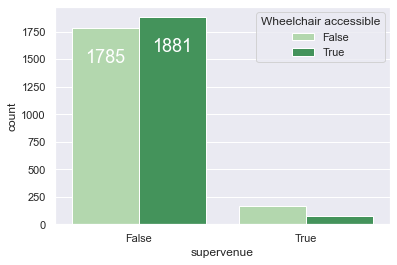

In [ ]:
ax4 = sns.countplot(x='supervenue', data=df_new, hue='Wheelchair accessible', palette='Greens')

for p in ax4.patches:
	ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [ ]:
# Like wi-fi, we will calculate the count using the groupby method
df_new.groupby('supervenue')['Wheelchair accessible'].value_counts()

supervenue  Wheelchair accessible
0           1                        1881
            0                        1785
1           0                         170
            1                          74
Name: Wheelchair accessible, dtype: int64

In [ ]:
# 93% of the venues are not classified as supervenues
df['supervenue'].value_counts(normalize=True)

False    0.937596
True     0.062404
Name: supervenue, dtype: float64

* Promoted/ticketed events
This feature describes whether or not the venue hosts promoted/ticketed events.

0 = No promoted/ticketed events, 1 = Yes promoted/ticketed events

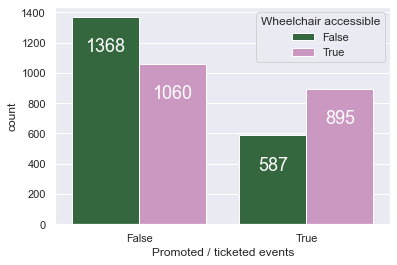

In [ ]:
ax5 = sns.countplot(x='Promoted / ticketed events', data=df, hue='Wheelchair accessible', palette='cubehelix')

for p in ax5.patches:
	ax5.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

### Observations:
* wi-fi: 93% of the venues have acess to wi-fi, so it is expected that this feature will be insignificant. However, we will leave it in the model for now.

* Similarly, 93% of the venues are not classified as supervenues, so it is also expected that this feature will also be insignificant.

* The rest of the features seem to have a signficiant difference in wheelchair accesibility between groups, so we can expect these features to be important in predicting the target variable.

## Numerical Features



* U-Shaped_max describes the maximum capacity of the U-shaped portion of the theatre (if any)
* max_standing describes the maximum capacity for people standing in the venue
* Theatre_max describes the overall maximum capacity for the theatre

We will look at a box-plot for each feature, grouped by our 'Wheelchair accessibly' target feature. We will also show a pairplot to check for any colinear relationships between our features.

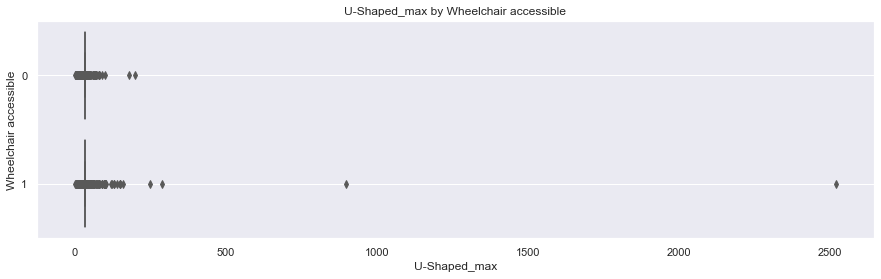

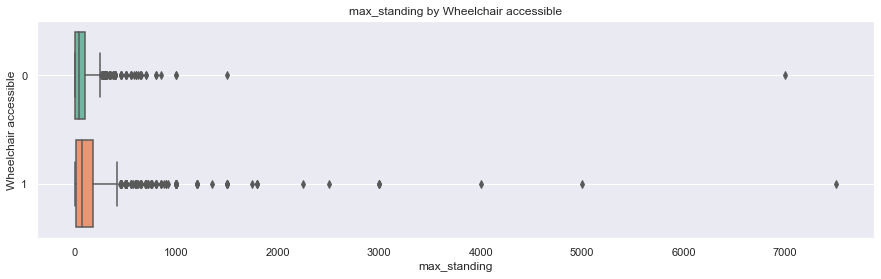

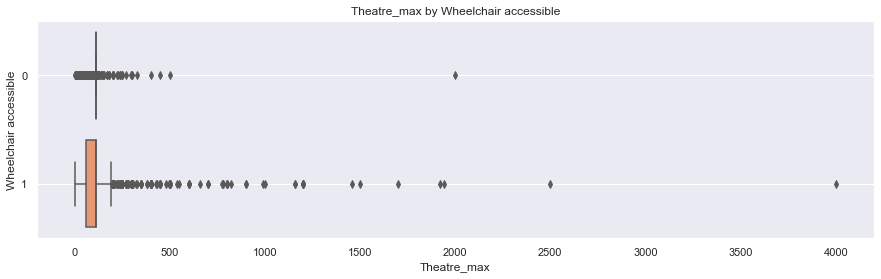

In [ ]:
num_df = ['U-Shaped_max', 'max_standing', 'Theatre_max']

for col in num_df:
    plt.figure(figsize=(15,4))
    sns.boxplot(data=df_new, x=col, y='Wheelchair accessible', orient='h', palette='Set2')
    title = col + ' by Wheelchair accessible'
    plt.title(title)
    plt.grid()

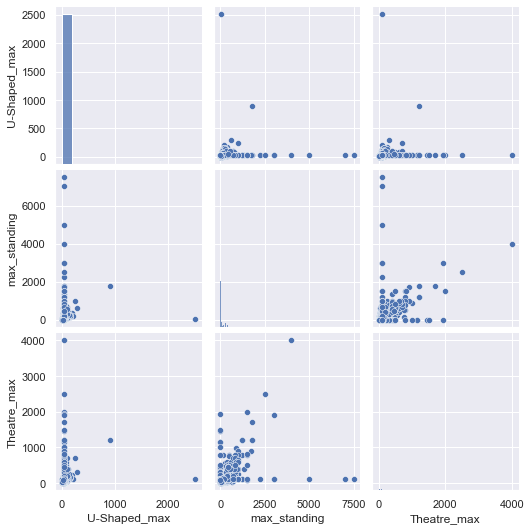

In [ ]:
sns.pairplot(df_new[num_df])

## Observations:

* The boxplots show that visually there isn't a significant difference in wheelchair accesibility based on the U-shaped max, but there is a bigger difference for max_stand and Theatre_max.
* We can also note that it looks like the majority of the venues are on the smaller side with max capacities less than 500, but there are some outliers there.
* There are no major colinear relationships between our variables, so any classfications models sensitive to collinearity are okay to use.

# Model Development

In [ ]:
# We will start by creating our features and target variables
X = df_new.drop('Wheelchair accessible', axis=1)
y = df_new['Wheelchair accessible']

In [ ]:
# It is always good practice to standardize the data, although it isn't always neccesary for certain models.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
# Create the train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Check the shape to verify the size of each set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3128, 8)
(3128,)
(782, 8)
(782,)


## Plan for Model
We will be creating a pipeline of several models with default hyperparamters just to get an idea of how each one performs with this data. From there we will choose a model to tune to increase our classification accuracy.

In [ ]:
# Create a pipeline of classification models to get an idea of which will have the highest predictive accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

## Checking for Accuracy

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
# Create a for-loop to check the accuracy for each model
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))

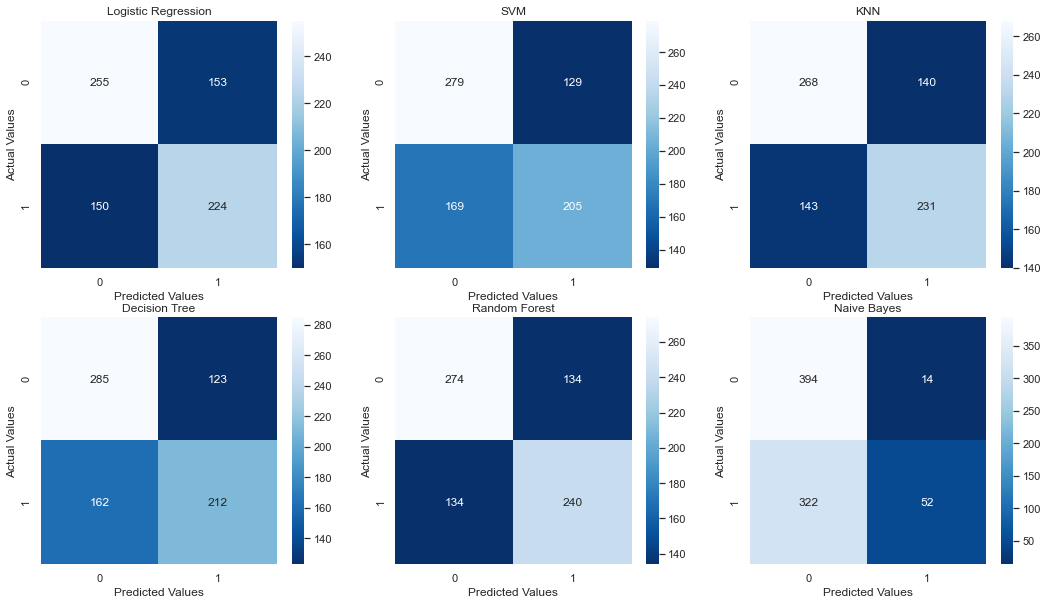

In [ ]:
# Heatmap to visualize the confusion matrices
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap='Blues_r', fmt='g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [ ]:
# Create a dataframe to view the accuracy for each model in an organized fashion
result_df = pd.DataFrame({'Model':model_list,
                         'Accuracy':acc_list,
                         'AUC':auc_list})

In [ ]:
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.612532,0.61
1,SVM,0.618926,0.62
2,KNN,0.638107,0.64
3,Decision Tree,0.635550,0.63
4,Random Forest,0.657289,0.66
5,Naive Bayes,0.570332,0.55


### Initial Results:
From our results dataframe we can see that the Random Forest performed the best here. It is important to keep in mind that this does not neccesarily mean that the other models are insignificant, but only that it performed the best with the default hyperparameters and with the data in its current form. 

We will now try to tune the random forest model to try and optimize our results.

The random forest model is ideal since it is a nonparametric machine learning algorithm. It is not weak to outliers and there are no data assumptions that need to be met, like normality or collinearity. So lets jump right in and see if we can tweak this model.

<AxesSubplot:>

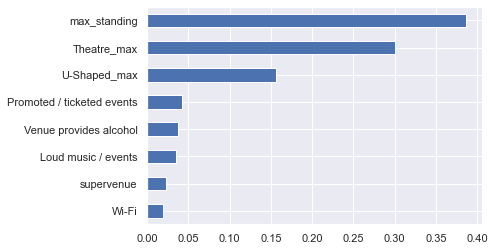

In [ ]:
# First, let's take a look at the feature importane calculated by the random forest model.
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

features = pd.Series(forest.feature_importances_, index=X.columns)
features = features.sort_values()
features.plot(kind='barh')

## Observations:
As predicted in our EDA, Wi-Fi and supervenue are the least important features. It may not be neccesary, but to simplify the model we will remove them before tuning the hyperparameters

In [ ]:
# Let's try to run the random forest model without the 'Wi-Fi' and 'supervenue' features.

X_new = X.drop(['Wi-Fi','supervenue'], axis=1)
X_new_scaled = sc.fit_transform(X_new)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_new,y_train_new)
rf_pred = rf.predict(X_test_new)
print(accuracy_score(y_test_new,rf_pred))

0.6317135549872123


In [ ]:
# The reduced model 63.2% accuracy, while our full model gave us 65.7%. The accuracy decreased by 2.5%, but we will keep this reduced model and try using RandomizedSearchCV for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator=rf,
                              param_distributions=random_grid,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              random_state=42,
                              n_jobs=-1)
rf_random.fit(X_train_new,y_train_new)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   4.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
y_pred_new = rf_random.predict(X_test_new)
print(accuracy_score(y_test,y_pred_new))

0.6624040920716112


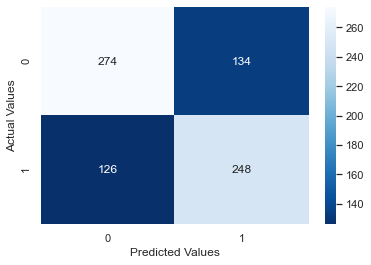

In [ ]:
rf_cm = sns.heatmap(confusion_matrix(y_test_new,y_pred_new), cmap='Blues_r', annot=True, fmt='g')
rf_cm.set_xlabel('Predicted Values')
rf_cm.set_ylabel('Actual Values')
plt.show()

### Conclusions:
The reduced model with tuned hyperparameters give us an accuracy of approximately 66.8%. Note, the full model with the tuned hyperparameters gave us an accuracy of about 66.2%. The reduced model has a better accuracy of 0.6%, but more importantly a simpler model is always prefered.

With an accruacy of 66.8%, we are hitting the success criteria of two-thirds prediction accuracy. More specifically, 274/408 = 67% for the venues without wheelchair accessibility were correctly classfied and 248/374 = 66% for the venues with wheelchair accesibility were correctly classified.

To increase this accuracy, it may be neccesary to collect more detailed data on the venues. Data such as location (i.e. urban, rural, suburban, etc.) and size of the venue (in square feet) are some ideas to start with. It may be important to include more detailed information about the types of events being held (i.e concerts, sporting events, comedy shows, etc.)